# EDA for Car Failure Dataset

### Import all relevant modules

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

## Read and clean data

### Read data and rename columns 

In [2]:
# Read data into pd df from db

con = sqlite3.connect("data/failure.db")
df = pd.read_sql_query("SELECT * from failure", con)
con.close()

In [3]:
# Preview data

df

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,64921ab7-c024-447a-8651-006a7e8a5e64,"Model 5, 2020",White,110.6 °C,1575,"Shang Hai, China",Low,728.5,Premium,0,0,0,0,0
10077,246aa846-094d-441a-814a-ecf64d4e3775,"Model 5, 2020",White,110.6 °C,1750,"Berlin, Germany",Low,698.9,Premium,0,0,0,0,0
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
10079,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,"Model 3, 2019",Blue,110.6 °C,1523,"Berlin, Germany",High,638.8,Premium,0,0,0,0,0


In [4]:
# Check the data types

df.dtypes

Car ID               object
Model                object
Color                object
Temperature          object
RPM                   int64
Factory              object
Usage                object
Fuel consumption    float64
Membership           object
Failure A             int64
Failure B             int64
Failure C             int64
Failure D             int64
Failure E             int64
dtype: object

In [5]:
# Rename the Car ID, Fuel consumption, and Failure columns in Pascal_Snake_Case to keep the variable names consistent.

df = df.rename(columns={"Car ID": "Car_ID", "Fuel consumption" : "Fuel_Consumption", "Failure A": "Failure_A", "Failure B": "Failure_B", "Failure C": "Failure_C", "Failure D": "Failure_D", "Failure E": "Failure_E"})

### Check for any missing values in the dataset

In [6]:
df.isnull().sum()

Car_ID                0
Model                 0
Color                 0
Temperature           0
RPM                   0
Factory               0
Usage                 0
Fuel_Consumption      0
Membership          384
Failure_A             0
Failure_B             0
Failure_C             0
Failure_D             0
Failure_E             0
dtype: int64

Only the Membership column has null values.
We will check each column following the order of the dataframe, but starting with the non-numeric data first. 
We will leave the Membership column checking to the end to decide what to do with the null values after we have all the other columns cleaned.

### Check the Car_ID column

In [7]:
df["Car_ID"].value_counts()

81fc248e-c9d4-432d-ad20-9521d504d129    2
a7b8b1ef-02fa-4a9d-a1c6-87ddde63f7cb    2
874a4763-774d-4c8a-b35a-bc8f74095f92    2
a807181e-9c1b-420b-9151-5b095933df24    2
14e682ab-81fe-4870-b7e7-920455791f87    2
                                       ..
f57e14cb-29eb-495e-a453-0dbd14be4980    1
0c757b90-5ebc-44b6-af05-94733bc81f85    1
a6abfb3b-781a-4080-b3b7-083bc4da49f3    1
688f4ff7-ae69-401c-b568-c11113dd73e1    1
8aa49bd0-e297-4e6d-a031-72ea40325e75    1
Name: Car_ID, Length: 10000, dtype: int64

In [8]:
df["Car_ID"].str.contains('[A-Z]').any()

False

In [9]:
df[df.duplicated(["Car_ID"], keep=False)].sort_values(by="Car_ID")

,Car_ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel_Consumption,Membership,Failure_A,Failure_B,Failure_C,Failure_D,Failure_E
10046,05fc6931-1619-4077-976e-26caf0f7ddab,"Model 5, 2013",Black,231.1 °F,-1679,"New York, U.S",High,697.9,Normal,0,0,0,0,0
66,05fc6931-1619-4077-976e-26caf0f7ddab,"Model 5, 2013",Black,231.1 °F,-1679,"New York, U.S",High,697.9,Normal,0,0,0,0,0
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
98,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
10006,0d510f67-2238-4de0-9ac9-1e5a8e345622,"Model 3, 2018",Red,110.7 °C,1512,"Berlin, Germany",Low,601.2,Premium,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,f5d387f3-b41f-457a-9ae8-1f77e3eafbcb,"Model 3, 2014",White,110.6 °C,1393,"Berlin, Germany",Low,614.8,Normal,0,0,0,0,0
20,fb6b1d49-ed23-42f2-8e39-292e568f517d,"Model 7, 2019",White,110.6 °C,1375,"Shang Hai, China",High,753.5,Normal,0,0,0,0,0
10000,fb6b1d49-ed23-42f2-8e39-292e568f517d,"Model 7, 2019",White,110.6 °C,1375,"Shang Hai, China",High,753.5,Normal,0,0,0,0,0
99,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,"Model 3, 2019",Blue,110.6 °C,1523,"Berlin, Germany",High,638.8,Premium,0,0,0,0,0


In [10]:
df[df.duplicated(keep=False)].sort_values(by="Car_ID")

,Car_ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel_Consumption,Membership,Failure_A,Failure_B,Failure_C,Failure_D,Failure_E
10046,05fc6931-1619-4077-976e-26caf0f7ddab,"Model 5, 2013",Black,231.1 °F,-1679,"New York, U.S",High,697.9,Normal,0,0,0,0,0
66,05fc6931-1619-4077-976e-26caf0f7ddab,"Model 5, 2013",Black,231.1 °F,-1679,"New York, U.S",High,697.9,Normal,0,0,0,0,0
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
98,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
10006,0d510f67-2238-4de0-9ac9-1e5a8e345622,"Model 3, 2018",Red,110.7 °C,1512,"Berlin, Germany",Low,601.2,Premium,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,f5d387f3-b41f-457a-9ae8-1f77e3eafbcb,"Model 3, 2014",White,110.6 °C,1393,"Berlin, Germany",Low,614.8,Normal,0,0,0,0,0
20,fb6b1d49-ed23-42f2-8e39-292e568f517d,"Model 7, 2019",White,110.6 °C,1375,"Shang Hai, China",High,753.5,Normal,0,0,0,0,0
10000,fb6b1d49-ed23-42f2-8e39-292e568f517d,"Model 7, 2019",White,110.6 °C,1375,"Shang Hai, China",High,753.5,Normal,0,0,0,0,0
99,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,"Model 3, 2019",Blue,110.6 °C,1523,"Berlin, Germany",High,638.8,Premium,0,0,0,0,0


The duplicates in the Car ID column are identical across all the columns.
We will remove all other instances of duplicates to prevent inflation of data.

In [11]:
df = df.drop_duplicates()
len(df)

10000

### Check the Model column

In [12]:
df["Model"].value_counts()

Model 3, 2016    586
Model 3, 2020    562
Model 3, 2021    560
Model 3, 2012    556
Model 3, 2014    552
Model 3, 2018    541
Model 3, 2019    532
Model 3, 2013    528
Model 3, 2015    526
Model 3, 2017    509
Model 3, 2022    315
Model 5, 2018    314
Model 5, 2020    306
Model 5, 2014    289
Model 5, 2016    288
Model 5, 2012    274
Model 5, 2017    267
Model 5, 2013    263
Model 5, 2015    247
Model 5, 2021    245
Model 5, 2019    244
Model 3, 2011    201
Model 5, 2022    170
Model 7, 2014    103
Model 7, 2016     97
Model 7, 2018     95
Model 7, 2020     94
Model 7, 2015     90
Model 7, 2019     90
Model 7, 2017     88
Model 7, 2012     86
Model 7, 2013     84
Model 7, 2021     84
Model 5, 2011     82
Model 7, 2022     60
Model 3, 2010     31
Model 7, 2011     27
Model 5, 2010      7
Model 7, 2010      5
Model 3, 2009      1
Model 5, 2009      1
Name: Model, dtype: int64

We can extract the model number and year from the Model column.

In [13]:
df = df.assign(
    Model_Num = df["Model"].str.split(",").str[0],
    Model_Year = df["Model"].str.split(",").str[1]
)
df.loc[:, "Model_Num"] = df["Model_Num"].str[-1]
df = df.astype({"Model_Year": "int64"})
df.loc[:, "Model_Year"] = df["Model_Year"] - df["Model_Year"].min()

In [14]:
print(df["Model_Num"].value_counts())
print(df["Model_Year"].value_counts())

3    6000
5    2997
7    1003
Name: Model_Num, dtype: int64
7     971
11    962
9     950
5     944
3     916
12    889
4     875
10    866
8     864
6     863
13    545
2     310
1      43
0       2
Name: Model_Year, dtype: int64


### Check the Color column

In [15]:
df["Color"].value_counts()

White    5568
Red      1159
Blue     1129
Grey     1086
Black    1058
Name: Color, dtype: int64

### Check the Factory column

In [16]:
df["Factory"].value_counts()

Shang Hai, China    5478
Berlin, Germany     2215
New York, U.S       2127
Seng Kang, China     106
Newton, China         44
Bedok, Germany        30
Name: Factory, dtype: int64

Hmm...why are Seng Kang, Newton and Bedok in China and Germany? 🤔

We can extract the region and country of manufacture from the Factory column.

In [17]:
df = df.assign(
    Factory_Region = df["Factory"].str.split(", ").str[0],
    Factory_Country = df["Factory"].str.split(", ").str[1]
)

In [18]:
df["Factory_Region"].value_counts()

Shang Hai    5478
Berlin       2215
New York     2127
Seng Kang     106
Newton         44
Bedok          30
Name: Factory_Region, dtype: int64

In [19]:
df["Factory_Country"].value_counts()

China      5628
Germany    2245
U.S        2127
Name: Factory_Country, dtype: int64

### Check the Usage column

In [20]:
df["Usage"].value_counts()

High      3527
Medium    3335
Low       3138
Name: Usage, dtype: int64

In [21]:
# Make the Usage column ordinal 
df.loc[df["Usage"] == "Low", "Usage"] = 1
df.loc[df["Usage"] == "Medium", "Usage"] = 2
df.loc[df["Usage"] == "High", "Usage"] = 3

df["Usage"].value_counts()

3    3527
2    3335
1    3138
Name: Usage, dtype: int64

### Check the Failure columns

In [22]:
df[["Failure_A", "Failure_B", "Failure_C", "Failure_D", "Failure_E"]].value_counts()

Failure_A  Failure_B  Failure_C  Failure_D  Failure_E
0          0          0          0          0            8738
                      1          0          0             310
                      0          0          1             264
1          0          0          0          0             259
0          0          0          1          0             244
           1          0          0          0             185
dtype: int64

In [23]:
df[["Failure_A", "Failure_B", "Failure_C", "Failure_D", "Failure_E"]].value_counts().sum()

10000

Whenever there are any failures, there is only exactly one type of failure occuring.
<br>
As such, we can collate all the Failure columns into one categorical column.

In [24]:
df = df.assign(Failure_Type = "0")
df.loc[df["Failure_A"] == 1, "Failure_Type"] = "A"
df.loc[df["Failure_B"] == 1, "Failure_Type"] = "B"
df.loc[df["Failure_C"] == 1, "Failure_Type"] = "C"
df.loc[df["Failure_D"] == 1, "Failure_Type"] = "D"
df.loc[df["Failure_E"] == 1, "Failure_Type"] = "E"

### Check the Temperature column

In [25]:
df["Temperature"].value_counts()

110.2 °C    785
110.3 °C    582
110.4 °C    534
110.6 °C    489
110.1 °C    324
           ... 
110.0 °C      3
230.7 °C      1
278.2 °F      1
138.7 °C      1
274.9 °F      1
Name: Temperature, Length: 125, dtype: int64

In [26]:
df["Temperature"].str.match("^[1-9]\d\d.\d °[CF]$").all()

True

The units of the temperature column need to be standardised.
We will convert all values to Celsius.

In [27]:
df = df.assign(Temperature_Value = df["Temperature"].str.split(" ").str[0], Temperature_Unit = df["Temperature"].str.split(" ").str[1])
df = df.astype({"Temperature_Value": float})

In [28]:
Fahrenheit_rows = df["Temperature_Unit"] == "°F"
df.loc[Fahrenheit_rows, "Temperature_Value"]

10      230.8
11      230.9
17      230.9
24      231.1
29      231.1
        ...  
9979    230.8
9985    230.9
9988    231.1
9990    231.0
9998    231.1
Name: Temperature_Value, Length: 2170, dtype: float64

In [29]:
df.loc[Fahrenheit_rows, "Temperature_Value"] = ((df.loc[Fahrenheit_rows, "Temperature_Value"] - 32) * 5/9).round(1)
df.loc[Fahrenheit_rows, "Temperature_Value"]

10      110.4
11      110.5
17      110.5
24      110.6
29      110.6
        ...  
9979    110.4
9985    110.5
9988    110.6
9990    110.6
9998    110.6
Name: Temperature_Value, Length: 2170, dtype: float64

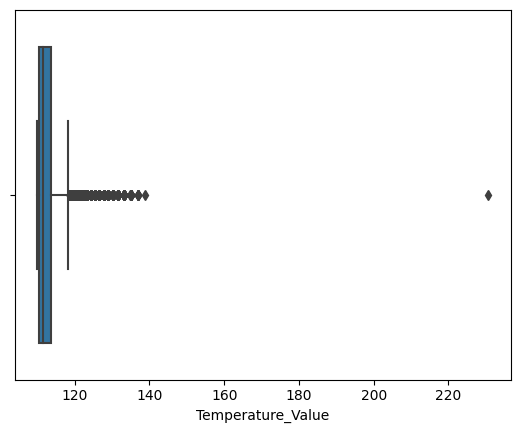

In [30]:
sns.boxplot(data=df, x="Temperature_Value")
plt.show()

There is one outlier with a very high temperature value of around 230 °C.

In [31]:
trimmed_Temperature_Value = df[df["Temperature_Value"]<200]["Temperature_Value"]

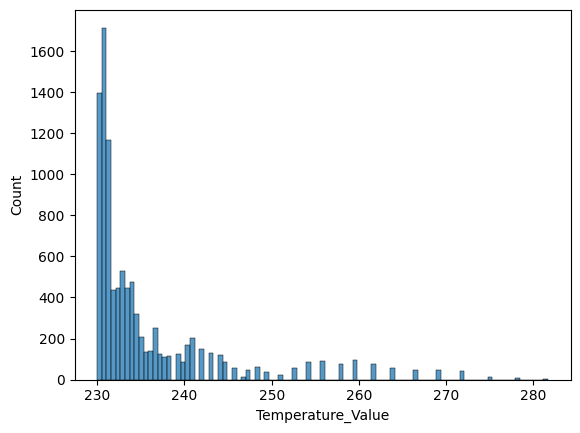

In [32]:
sns.histplot(data=(9/5)*trimmed_Temperature_Value + 32)
plt.show()

The indicated temperature seems to be well within the range of the other values if the other values were converted to Fahrenheit. 

In [33]:
print(pd.crosstab(df["Temperature_Unit"], df["Factory_Region"]))
print("_"*80+"\n")
print(pd.crosstab(df["Temperature_Unit"], df["Factory_Country"]))

Factory_Region    Bedok  Berlin  New York  Newton  Seng Kang  Shang Hai
Temperature_Unit                                                       
°C                   30    2215         1       0        106       5478
°F                    0       0      2126      44          0          0
________________________________________________________________________________

Factory_Country   China  Germany   U.S
Temperature_Unit                      
°C                 5584     2245     1
°F                   44        0  2126


All the original temperature units are the same across the same region except for the outlier. This suggests that there was likely an error in the unit of temperature recorded, rather than in the temperature value reading by the temperature sensor. This hypothesis is further supported by how similar the value would be to the rest of the data if it were converted from Fahrenheit to Celsius instead.
<br><br>
As such, we will assume that the outlier's unit of temperature is actually in °F, and convert it accordingly before adding it back to the dataset.

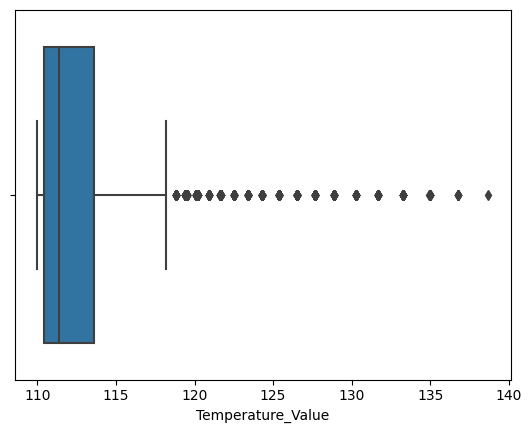

In [34]:
df.loc[df["Temperature_Value"] > 200, "Temperature_Value"] = ((df[df["Temperature_Value"] > 200]["Temperature_Value"]- 32) * 5/9).round(1)
sns.boxplot(data=df, x="Temperature_Value")
plt.show()

### Check the RPM column

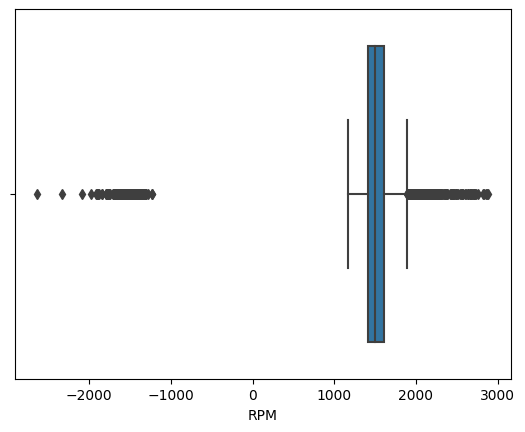

In [35]:
sns.boxplot(data=df, x="RPM")
plt.show()

There are some negative values in the RPM column.
<br><br>
By definition, the RPM of an engine is always measured as a positive number, as it is the number of rotations in one minute. 
<br><br>
Since the magnitudes of the negative values are in the same range as that of the postive values, we will assume that this is due to a systematic error in the signs of these values.
For now, we will create a new column the absolute values of the RPM column, and include an additional column to indicate if the value was originally negative.

In [36]:
df = df.assign(RPM_Negative = df["RPM"]<0)
sum(df["RPM_Negative"])

220

In [37]:
df = df.assign(RPM_Abs = abs(df["RPM"]))

### Check the Fuel_Consumption column

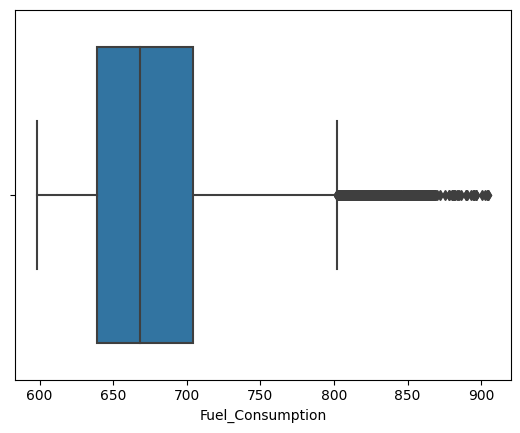

In [38]:
sns.boxplot(data=df, x="Fuel_Consumption")
plt.show()

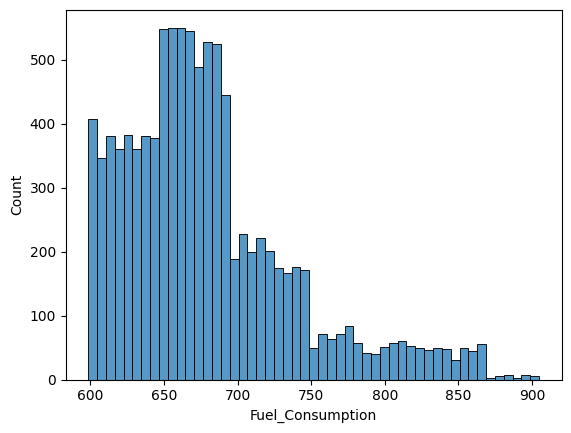

In [39]:
sns.histplot(data=df, x="Fuel_Consumption")
plt.show()

### Check the Membership column

In [40]:
print(df["Membership"].value_counts())
print("Null\t", df["Membership"].isnull().sum())

Normal     4483
Premium    3416
None       1718
Name: Membership, dtype: int64
Null	 383


In [41]:
df["Membership"].value_counts().sum() + df["Membership"].isnull().sum()

10000

For now, let's create a Membership_Type column and replace the null values with "Unknown".

In [42]:
df = df.assign(Membership_Type = df["Membership"].copy())
df.loc[df["Membership"].isnull(), "Membership_Type"] = "Unknown"

Car owners are automatically subscribed with “Normal” membership for the first five years after car purchase. Let's check if every car manufactured within the last 5 years has a membership.

In [43]:
df[(df["Model_Year"]> df["Model_Year"].max()-5)]["Membership_Type"].value_counts()

Normal     1921
Premium    1908
Unknown     383
Name: Membership_Type, dtype: int64

In [44]:
df[df["Membership_Type"]=="Unknown"]["Model_Year"].value_counts()

9     88
11    80
10    78
12    74
13    63
Name: Model_Year, dtype: int64

All the rows cars with unknown membership type have been manufactured within the last five years.
<br> <br>

Let's check the number of each type of failure for each membership class (including those with null values)

In [45]:
pd.crosstab(df["Membership_Type"], df["Failure_Type"])

Failure_Type,0,A,B,C,D,E
Membership_Type,,,,,,
None,1265,118,57,93,89,96
Normal,4281,37,27,53,43,42
Premium,3192,45,41,60,44,34
Unknown,0,59,60,104,68,92


All the cars with unknown membership type have some form of failure. Removing these rows will worsen the class imbalance in the dataset.<br>
For now, we will keep them as a separate membership type, and rank them in order of their probability of failure.

In [46]:
# Make the Membership column ordinal
df.loc[df["Membership_Type"] == "Unknown", "Membership_Type"] = 0
df.loc[df["Membership_Type"] == "None", "Membership_Type"] = 1
df.loc[df["Membership_Type"] == "Normal", "Membership_Type"] = 2
df.loc[df["Membership_Type"] == "Premium", "Membership_Type"] = 3
df["Membership_Type"].value_counts()

2    4483
3    3416
1    1718
0     383
Name: Membership_Type, dtype: int64

### Check the data types

In [47]:
df = df.astype({
    "Car_ID": "object",
    "Model": "object",
    "Color": "category",
    "Temperature": "object",
    "RPM": "object",
    "Factory": "object",
    "Usage": "category",
    "Fuel_Consumption": "float64",
    "Membership": "object",
    "Failure_A": "object",
    "Failure_B": "object",
    "Failure_C": "object",
    "Failure_D": "object",
    "Failure_E": "object",
    "Membership_Type": "category",
    "Model_Num": "category",
    "Model_Year": "category",
    "Temperature_Value": "float64",
    "Temperature_Unit": "category",
    "RPM_Negative": "category",
    "RPM_Abs": "int64",
    "Factory_Region": "category",
    "Factory_Country": "category",
    "Failure_Type": "category"
})

In [48]:
df.dtypes

Car_ID                 object
Model                  object
Color                category
Temperature            object
RPM                    object
Factory                object
Usage                category
Fuel_Consumption      float64
Membership             object
Failure_A              object
Failure_B              object
Failure_C              object
Failure_D              object
Failure_E              object
Model_Num            category
Model_Year           category
Factory_Region       category
Factory_Country      category
Failure_Type         category
Temperature_Value     float64
Temperature_Unit     category
RPM_Negative         category
RPM_Abs                 int64
Membership_Type      category
dtype: object

### Preview cleaned date

In [49]:
df

,Car_ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel_Consumption,Membership,Failure_A,...,Model_Num,Model_Year,Factory_Region,Factory_Country,Failure_Type,Temperature_Value,Temperature_Unit,RPM_Negative,RPM_Abs,Membership_Type
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",2,659.7,Normal,0,...,5,13,Shang Hai,China,0,110.3,°C,False,1551,2
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",2,705.3,Premium,1,...,3,13,Shang Hai,China,A,110.4,°C,False,1408,3
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",1,670.7,Premium,0,...,3,13,Shang Hai,China,0,110.3,°C,False,1498,3
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",3,630.6,Premium,1,...,3,13,Berlin,Germany,A,110.4,°C,False,1433,3
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",3,660.9,Normal,0,...,3,13,New York,U.S,B,110.4,°C,False,1408,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,81f565b6-979a-4cd0-b157-907efecbdf61,"Model 5, 2021",Black,110.6 °C,1604,"Shang Hai, China",2,684.6,None,0,...,5,12,Shang Hai,China,E,110.6,°C,False,1604,0
9996,0ec0a296-d278-4a97-b35f-8434d5c976e8,"Model 7, 2021",Grey,110.6 °C,1632,"Shang Hai, China",2,865.4,None,0,...,7,12,Shang Hai,China,B,110.6,°C,False,1632,0
9997,30f99d04-5fe1-42c8-bfc1-5bcac4ea95a7,"Model 5, 2021",White,110.6 °C,1645,"Shang Hai, China",1,646.2,Premium,0,...,5,12,Shang Hai,China,0,110.6,°C,False,1645,3
9998,d1f669dc-6fe2-4a0d-b5a9-26d3c6ab2c59,"Model 7, 2021",White,231.1 °F,1408,"New York, U.S",3,837.0,Premium,0,...,7,12,New York,U.S,0,110.6,°F,False,1408,3


## Data Visualisation

### Numerical Data Analysis

In [50]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns

Index(['Fuel_Consumption', 'Temperature_Value', 'RPM_Abs'], dtype='object')

#### Scatter plots for every pair of numerical data columns

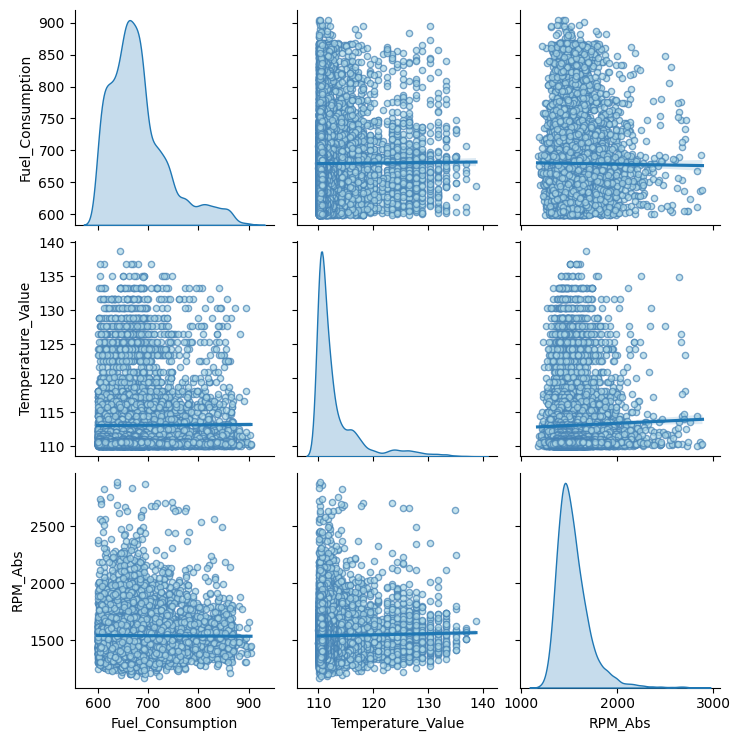

In [51]:
sns.pairplot(df[numerical_columns], kind="reg", diag_kind="kde", diag_kws={"fill": True}, plot_kws={"scatter_kws":{"s":20, "alpha":0.7, "color":"lightblue", "edgecolor":"steelblue", "linewidth":1}})
plt.show()

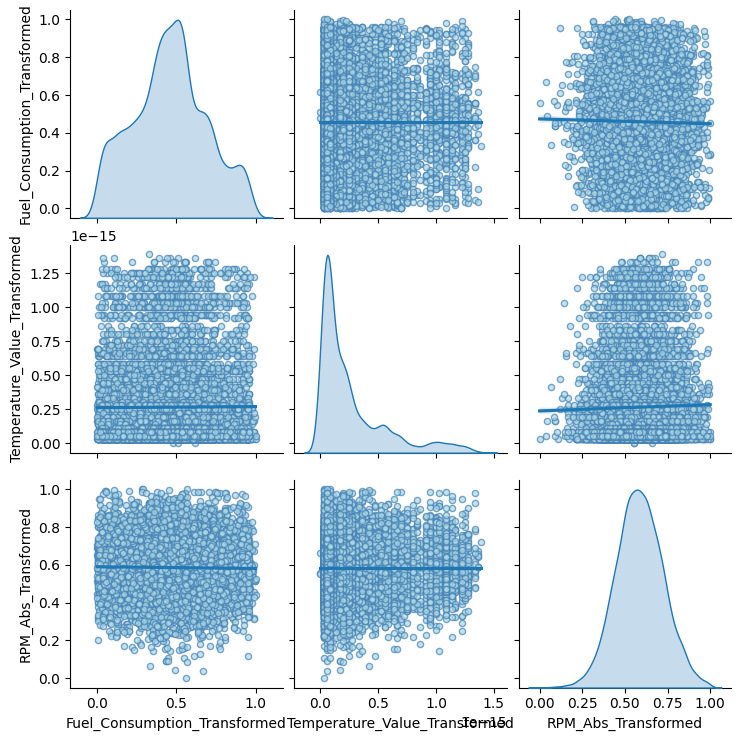

In [52]:
transformed_numerical_columns = []

for numerical_column in numerical_columns:
    pt = PowerTransformer()
    pt.fit(df[numerical_column].values.reshape(-1,1))
    df = df.assign(**{numerical_column+"_Transformed": pt.transform(df[numerical_column].values.reshape(-1,1)).reshape(len(df[numerical_column]))})
    transformed_numerical_columns.append(numerical_column+"_Transformed")

for transformed_numerical_column in transformed_numerical_columns:
    scaler = MinMaxScaler()
    scaler.fit(df[transformed_numerical_column].values.reshape(-1,1))
    df = df.assign(**{transformed_numerical_column: scaler.transform(df[transformed_numerical_column].values.reshape(-1,1)).reshape(len(df[transformed_numerical_column]))})

sns.pairplot(df[transformed_numerical_columns], kind="reg", diag_kind="kde", diag_kws={"fill": True}, plot_kws={"scatter_kws":{"s":20, "alpha":0.7, "color":"lightblue", "edgecolor":"steelblue", "linewidth":1}})
plt.show()

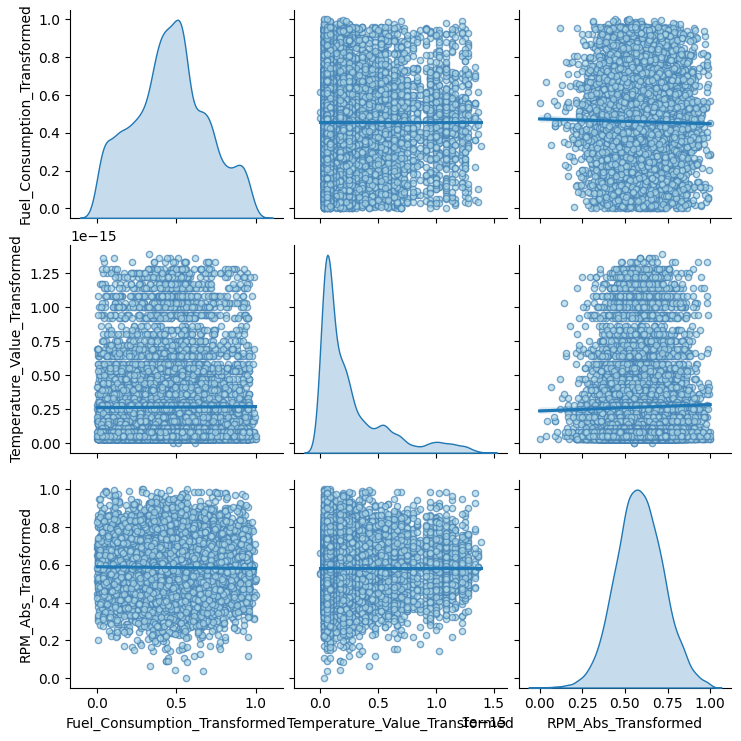

In [53]:
standardised_numerical_columns = []

for numerical_column in numerical_columns:
    scaler = StandardScaler()
    scaler.fit(df[numerical_column].values.reshape(-1,1))
    df = df.assign(**{numerical_column+"_Standardised": scaler.transform(df[numerical_column].values.reshape(-1,1)).reshape(len(df[numerical_column]))})
    standardised_numerical_columns.append(numerical_column+"_Standardised")

for standardised_numerical_column in standardised_numerical_columns:
    scaler = MinMaxScaler()
    scaler.fit(df[standardised_numerical_column].values.reshape(-1,1))
    df = df.assign(**{standardised_numerical_column: scaler.transform(df[standardised_numerical_column].values.reshape(-1,1)).reshape(len(df[standardised_numerical_column]))})

sns.pairplot(df[transformed_numerical_columns], kind="reg", diag_kind="kde", diag_kws={"fill": True}, plot_kws={"scatter_kws":{"s":20, "alpha":0.7, "color":"lightblue", "edgecolor":"steelblue", "linewidth":1}})
plt.show()

The RPM_Abs, Temperature_Value, and Fuel_Consumption seem to be related.
<br><br>
As the fuel consumption increases, there are fewer cars with higher RPM magnitude values. This could reflect a certain class of cars that are very fuel inefficient, thus requiring a lot of fuel and yet still producing rather low RPMs.
<br><br>
As the the magnitude of the RPM increases until about 1500 RPM, the temperature tends increase as well until around 140 °C, then it starts decreasing. This is probably because the car engine generally produces more heat when the RPM is higher, except when the car is just starting. In that case, "high RPM is normal behavior for the car when the engine is cold because it helps to gradually increase the engine oil temperature, decreasing its viscosity and heating the coolant to help the engine achieve its operating temperature by burning more fuel." (https://carphrases.com/high-rpm-when-the-engine-is-cold/)
<br><br>
Very high temperatures might contribute to car failures and should be looked into further.

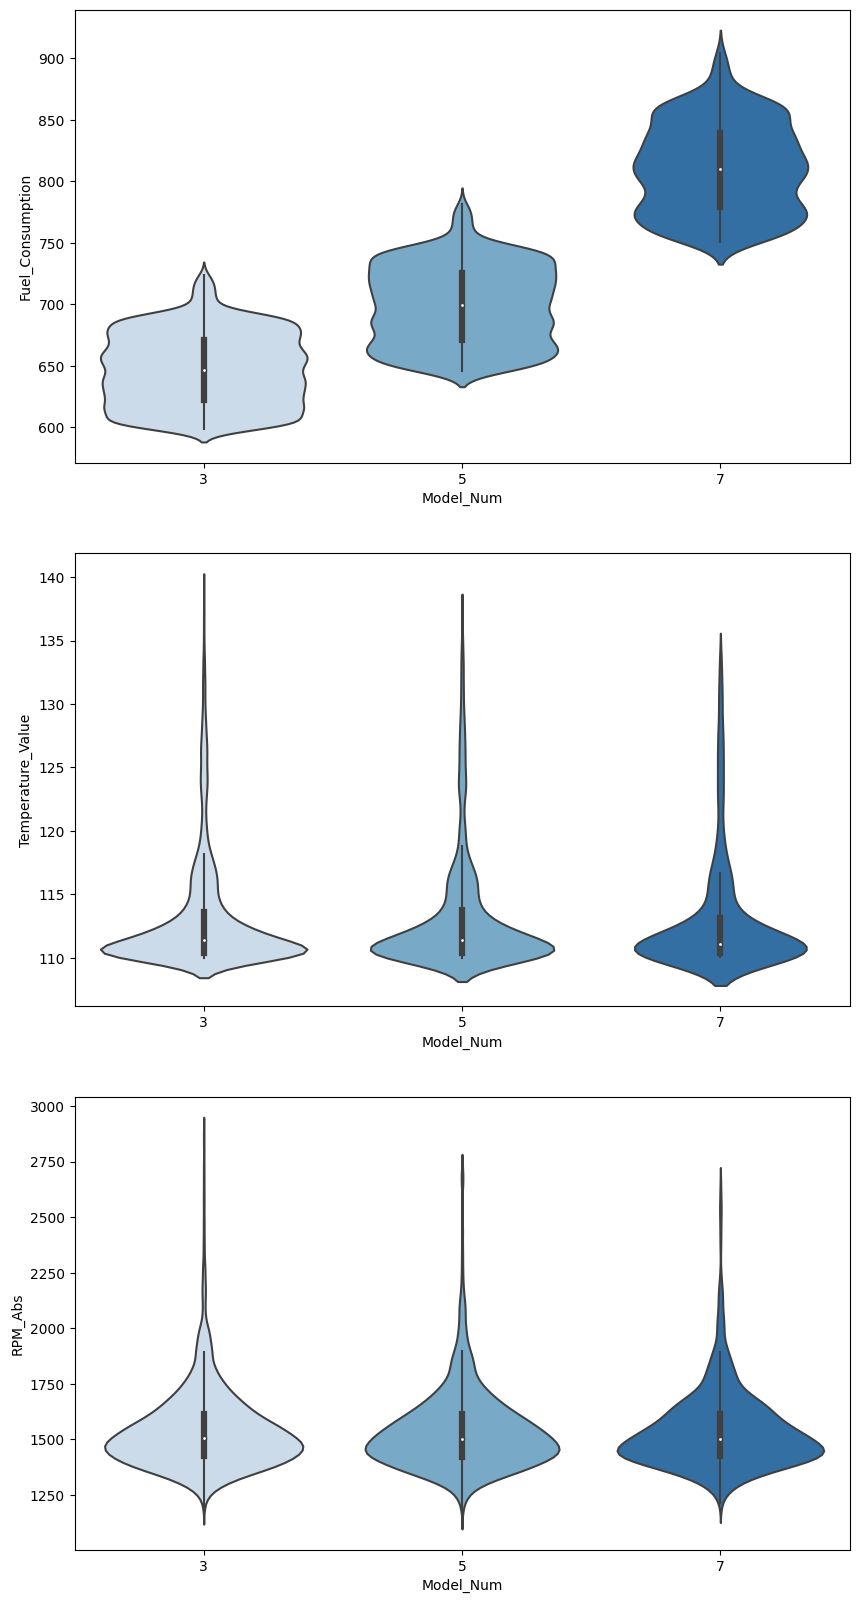

In [54]:
fig, axs = plt.subplots(len(numerical_columns), figsize=(10, 20))
for i in range(len(numerical_columns)):
    sns.violinplot(x="Model_Num", y=numerical_columns[i], data=df, palette="Blues", ax=axs[i])
plt.show()

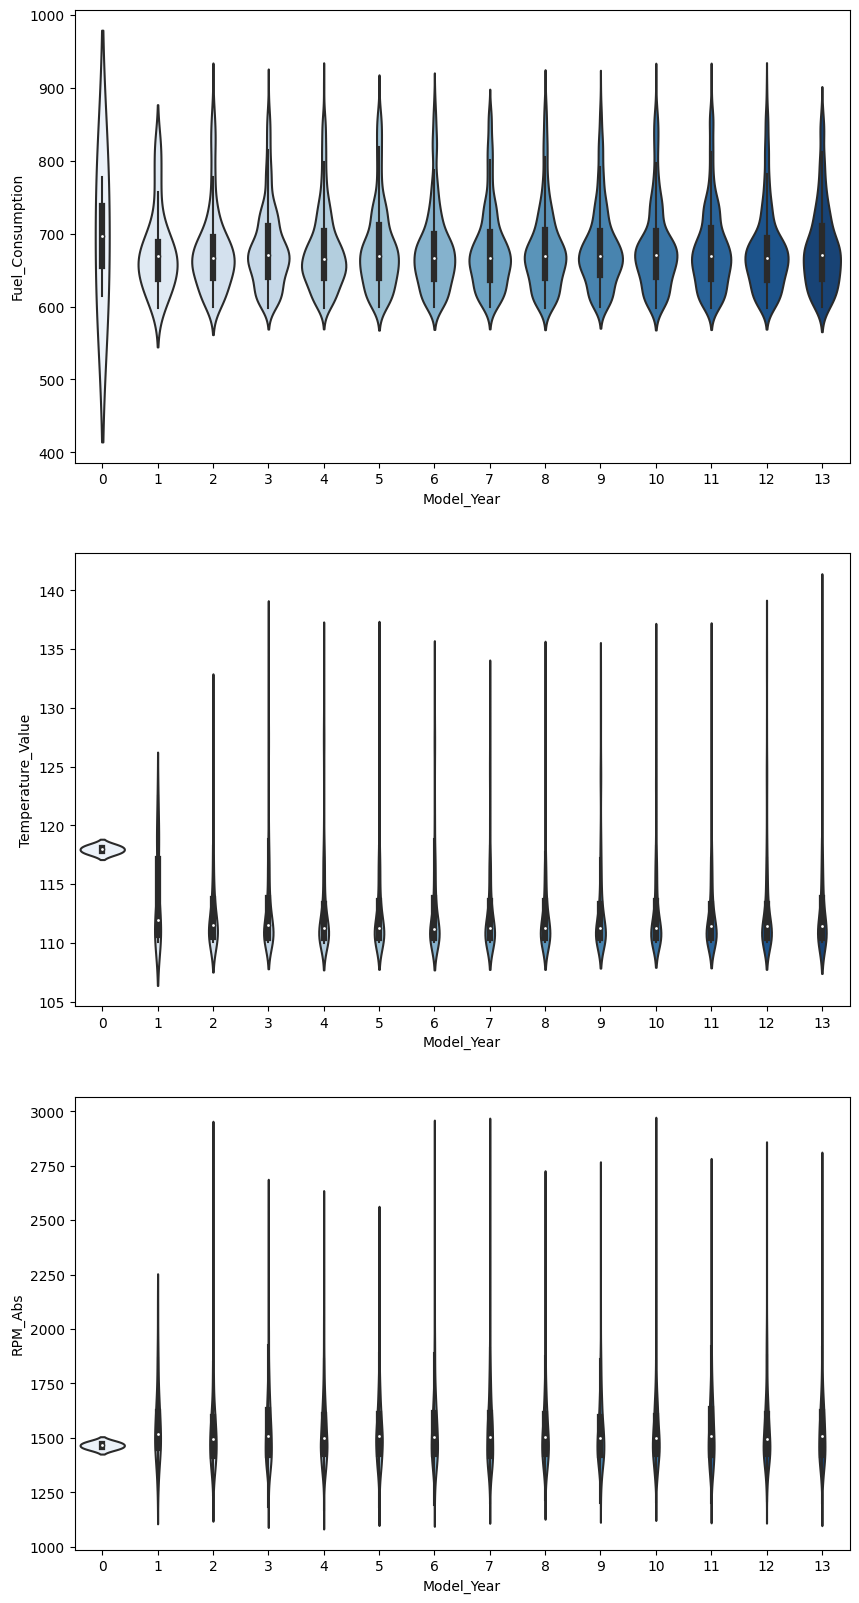

In [55]:
fig, axs = plt.subplots(len(numerical_columns), figsize=(10, 20))
for i in range(len(numerical_columns)):
    sns.violinplot(x="Model_Year", y=numerical_columns[i], data=df, palette="Blues", ax=axs[i])
plt.show()

#### Pearson correlation coefficient for every pair of numerical data columns

In [56]:
df[numerical_columns].corr()

,Fuel_Consumption,Temperature_Value,RPM_Abs
Fuel_Consumption,1.000000,0.006756,-0.007716
Temperature_Value,0.006756,1.000000,0.025860
RPM_Abs,-0.007716,0.025860,1.000000


Based on their Pearson correlation coefficients, Fuel consumption, temperature and RPM are not related with a correlation score of close to 0, allowing them to serve as independent features for predicting failure types

#### Kruskal-Wallis test on numerical columns and Failure

In [57]:
failure_columns = df.filter(like="Failure").columns
failure_columns

Index(['Failure_A', 'Failure_B', 'Failure_C', 'Failure_D', 'Failure_E',
       'Failure_Type'],
      dtype='object')

In [58]:
def KruskalWallis_test(numerical_columns, categorical_columns):
    test_results = []
    for categorical_column in categorical_columns:
        row = []
        for numerical_column in numerical_columns:
            groups = df.groupby(categorical_column)[numerical_column].apply(list)
            stat, p_value = kruskal(*groups)
            row.append(p_value)
        test_results.append(row)
    results_df = pd.DataFrame(test_results, columns=numerical_columns)
    results_df.insert(0, "categorical_column", categorical_columns)
    return results_df

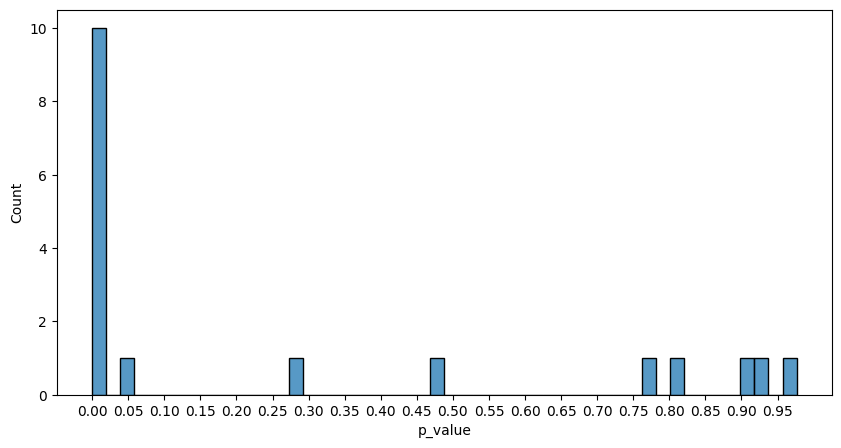

In [59]:
results_df = KruskalWallis_test(numerical_columns, failure_columns)
p_values = results_df.select_dtypes(include=["int64", "float64"]).stack().values
p_values = pd.DataFrame(p_values, columns = ["p_value"])

plt.figure(figsize=(10, 5))
plot = sns.histplot(x="p_value", data=p_values, bins=50)
plot.set(xticks=np.arange(0,1,1/20))
plt.show()

In [60]:
results_df.style.applymap(lambda x: "background-color : grey" if type(x)==(float or int) and abs(x)<0.05 else "")

,categorical_column,Fuel_Consumption,Temperature_Value,RPM_Abs
0,Failure_A,0.045904,0.904110,0.000000
1,Failure_B,0.000000,0.976513,0.770338
2,Failure_C,0.000196,0.000000,0.000000
3,Failure_D,0.000783,0.815718,0.472183
4,Failure_E,0.000674,0.291607,0.934410
5,Failure_Type,0.000000,0.000000,0.000000


#### KDE and Violin plots of numerical columns and Failure

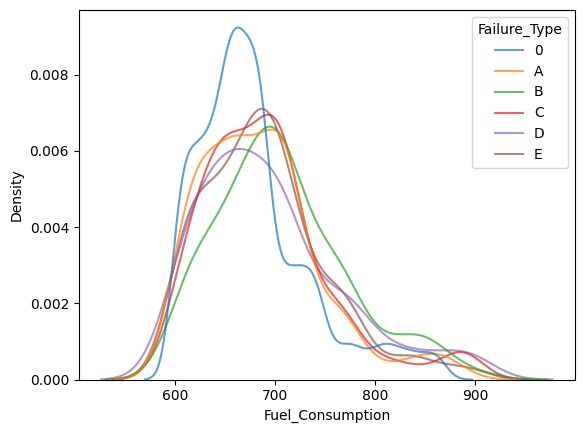

In [61]:
sns.kdeplot(data=df, x="Fuel_Consumption", hue="Failure_Type", alpha=0.7, common_norm=False)
plt.show()

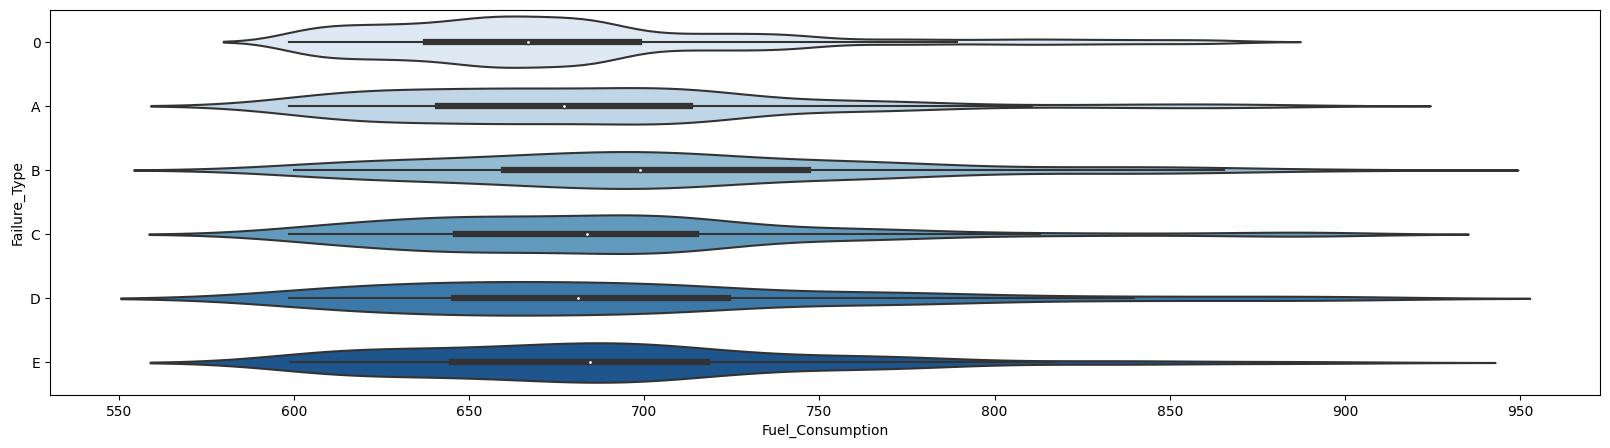

In [62]:
plt.figure(figsize=(20, 5))
sns.violinplot(x="Fuel_Consumption", y="Failure_Type", data=df, palette="Blues")
plt.show()

Generally, the cars with some failure type tend to have consumed more fuel than when those without any no failure.

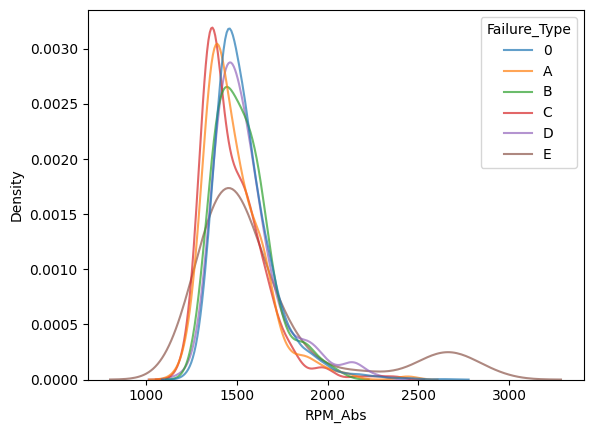

In [63]:
sns.kdeplot(data=df, x="RPM_Abs", hue="Failure_Type", alpha=0.7, common_norm=False)
plt.show()

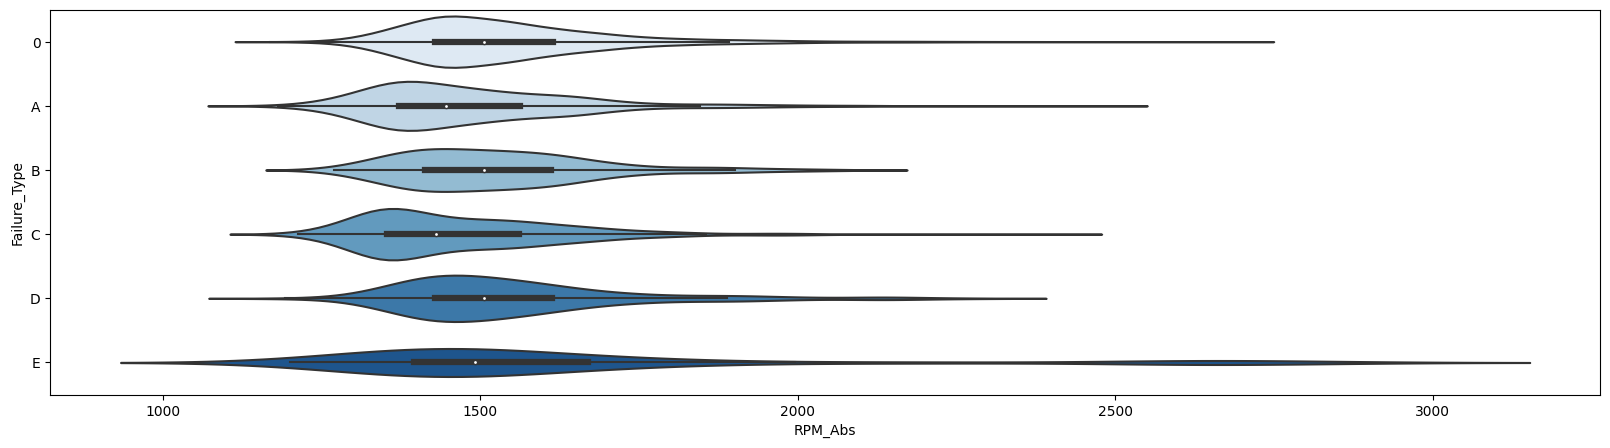

In [64]:
plt.figure(figsize=(20, 5))
sns.violinplot(x="RPM_Abs", y="Failure_Type", data=df, palette="Blues")
plt.show()

Generally, Failures A, C, and E seem to have lower RPM_Abs values compared to those of Failure 0.
<br>
Failures B, and D seem to have similar RPM_Abs values to Failure 0.

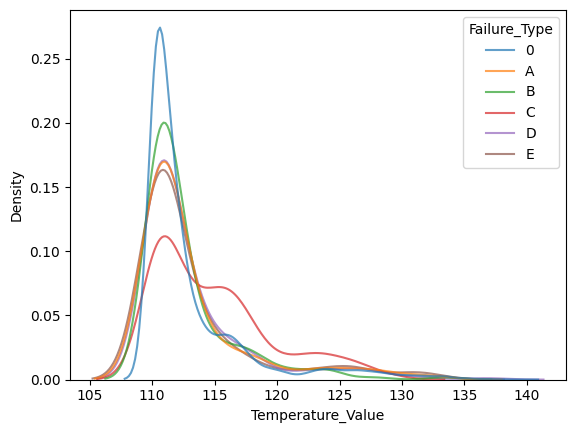

In [65]:
sns.kdeplot(data=df, x="Temperature_Value", hue="Failure_Type", alpha=0.7, common_norm=False)
plt.show()

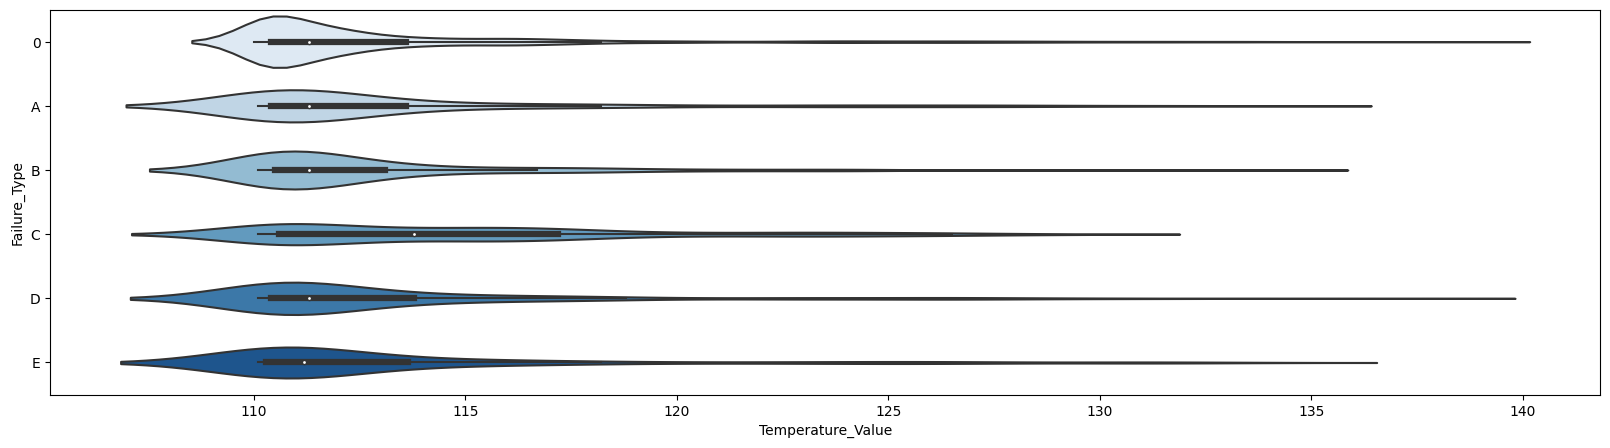

In [66]:
plt.figure(figsize=(20, 5))
sns.violinplot(x="Temperature_Value", y="Failure_Type", data=df, palette="Blues")
plt.show()

There is a larger proportion of cars experiencing higher car engine temperatures in the class of cars with Failure C than in the rest of cars. <br>

### Categorical Data Analysis

In [ ]:
cat_columns = df.select_dtypes(include=["category"]).columns
cat_columns

Index(['Color', 'Usage', 'Model_Num', 'Model_Year', 'Factory_Region',
       'Factory_Country', 'Failure_Type', 'Temperature_Unit', 'RPM_Negative',
       'Membership_Type'],
      dtype='object')

#### Chi-square test on every pair of categorical data columns

In [ ]:
p_values = []
contingency_tables = []

for col1, col2 in combinations(cat_columns, 2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    if (contingency_table.stack().values>5).all():
      statistic, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    else:
      p_value = None
    p_values.append((col1, col2, p_value))
    contingency_tables.append(contingency_table)

p_values = pd.DataFrame(p_values, columns=["col1", "col2", "p_value"])
p_values = p_values.sort_values(by="p_value")
p_values

,col1,col2,p_value
13,Usage,Failure_Type,2.472775e-31
16,Usage,Membership_Type,7.454624e-07
20,Model_Num,Failure_Type,1.608095e-05
35,Factory_Country,Failure_Type,4.578863e-02
38,Factory_Country,Membership_Type,1.683086e-01
8,Color,Membership_Type,1.823262e-01
23,Model_Num,Membership_Type,2.417418e-01
19,Model_Num,Factory_Country,2.470724e-01
39,Failure_Type,Temperature_Unit,2.982068e-01
12,Usage,Factory_Country,3.527278e-01


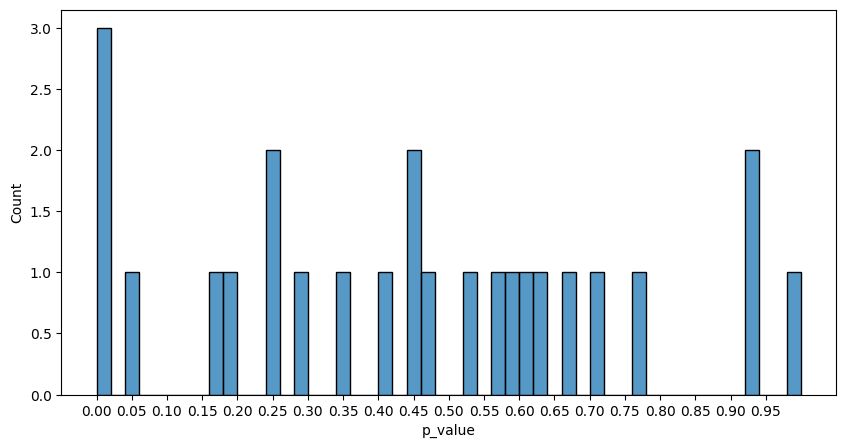

In [ ]:
plt.figure(figsize=(10, 5))
plot = sns.histplot(p_values["p_value"], bins=50)
plot.set(xticks=np.arange(0,1,1/20))
plt.show()

In [ ]:
small_p_values = p_values[p_values["p_value"] < 0.1]
small_p_values

,col1,col2,p_value
13,Usage,Failure_Type,2.472775e-31
16,Usage,Membership_Type,7.454624e-07
20,Model_Num,Failure_Type,1.608095e-05
35,Factory_Country,Failure_Type,4.578863e-02


In [ ]:
for i in small_p_values.index:
  print(contingency_tables[i])
  print("_"*80+"\n")

Failure_Type     0    A   B    C    D    E
Usage                                     
1             2922   41  35   60   38   42
2             2903   90  66   97   87   92
3             2913  128  84  153  119  130
________________________________________________________________________________

Membership_Type    0    1     2     3
Usage                                
1                 72  512  1430  1124
2                141  565  1517  1112
3                170  641  1536  1180
________________________________________________________________________________

Failure_Type     0    A    B    C    D    E
Model_Num                                  
3             5191  193  104  202  139  171
5             2670   44   57   79   71   76
7              877   22   24   29   34   17
________________________________________________________________________________

Failure_Type        0    A    B    C    D    E
Factory_Country                               
China            4879  134  116  19

In [ ]:
null_p_values = p_values[p_values["p_value"].isnull()]
null_p_values

,col1,col2,p_value
2,Color,Model_Year,NaN
3,Color,Factory_Region,NaN
10,Usage,Model_Year,NaN
11,Usage,Factory_Region,NaN
17,Model_Num,Model_Year,NaN
18,Model_Num,Factory_Region,NaN
24,Model_Year,Factory_Region,NaN
25,Model_Year,Factory_Country,NaN
26,Model_Year,Failure_Type,NaN
27,Model_Year,Temperature_Unit,NaN


In [ ]:
for i in null_p_values.index:
  print(contingency_tables[i])
  print("_"*80+"\n")

Model_Year  0   1    2    3    4    5    6    7    8    9   10   11   12   13
Color                                                                        
Black       0   6   33  105   90  101   78  102   93  113   96   96   82   63
Blue        0   3   41  113   99  111   98  115   92   94   97  104  102   60
Grey        0   2   25  114   94  102   78  105   88  105  107  112   91   63
Red         0   5   42   90   97  109   96  127   98  120  113  106   95   61
White       2  27  169  494  495  521  513  522  493  518  453  544  519  298
________________________________________________________________________________

Factory_Region  Bedok  Berlin  New York  Newton  Seng Kang  Shang Hai
Color                                                                
Black               3     228       216       7         15        589
Blue                2     246       243       4         11        623
Grey                2     230       214       3          8        629
Red                 6 

### Scatter and violin plots of Usage, Model Year, Model Number and Membership Type as Ordinals with Numerical columns

In [ ]:
df.loc[df["Usage"] == "Low", "Usage"] = 1
df.loc[df["Usage"] == "Medium", "Usage"] = 2
df.loc[df["Usage"] == "High", "Usage"] = 3

df.loc[df["Membership_Type"] == "Unknown", "Membership_Type"] = 0
df.loc[df["Membership_Type"] == "None", "Membership_Type"] = 1
df.loc[df["Membership_Type"] == "Normal", "Membership_Type"] = 2
df.loc[df["Membership_Type"] == "Premium", "Membership_Type"] = 3

ordinal_columns = ["Usage", "Model_Year", "Model_Num", "Membership_Type"]

In [ ]:
df = df.astype({
    "Usage": "int64",
    "Membership_Type": "int64",
    "Model_Num": "int64",
    "Model_Year": "int64"
})

In [ ]:
ordnum_columns = ["Usage", "Model_Year", "Model_Num", "Membership_Type", "Fuel_Consumption", "RPM_Abs", "Temperature_Value"]

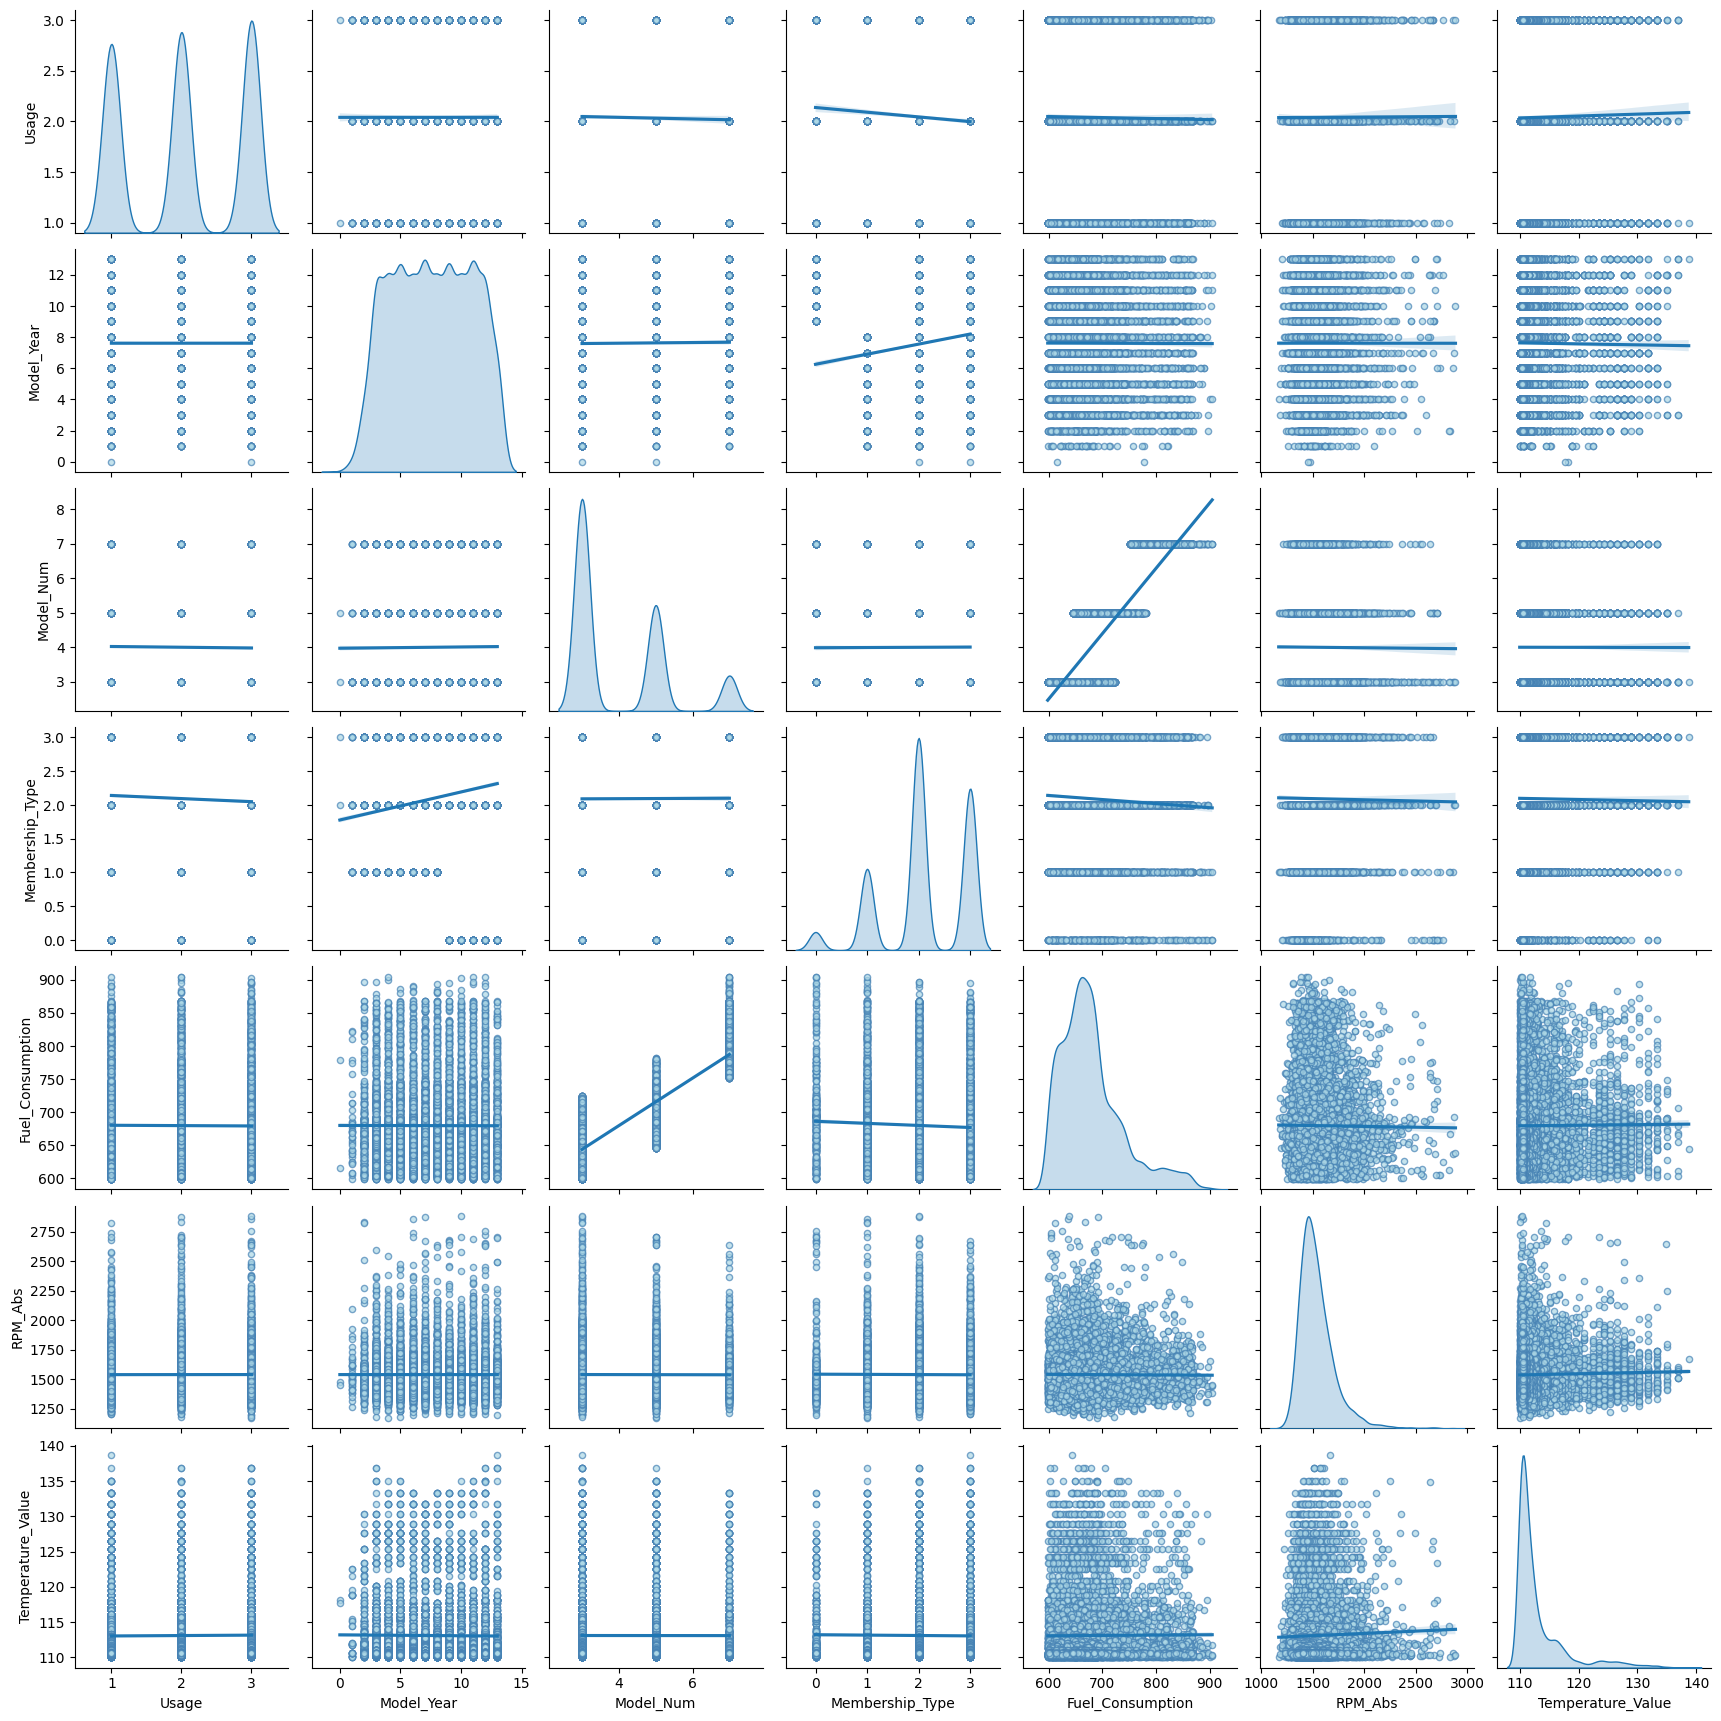

In [ ]:
sns.pairplot(df[ordnum_columns], kind="reg", diag_kind="kde", diag_kws={"fill": True}, plot_kws={"scatter_kws":{"s":20, "alpha":0.7, "color":"lightblue", "edgecolor":"steelblue", "linewidth":1}})
plt.show()

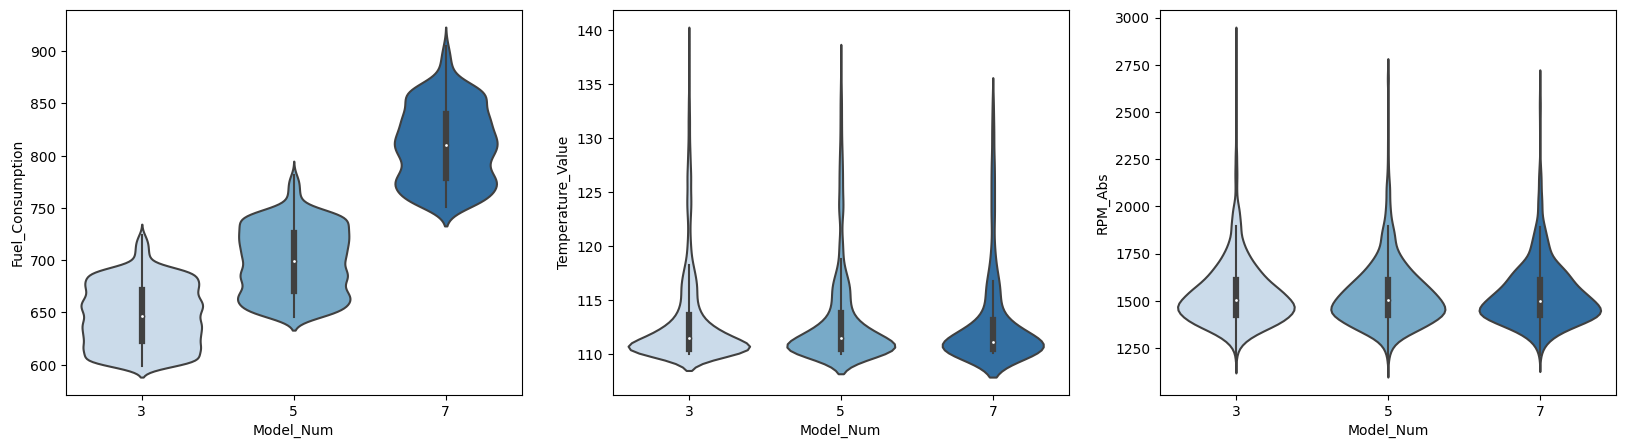

In [ ]:
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(20, 5))
for i in range(len(numerical_columns)):
    sns.violinplot(x="Model_Num", y=numerical_columns[i], data=df, palette="Blues", ax=axs[i])
plt.show()

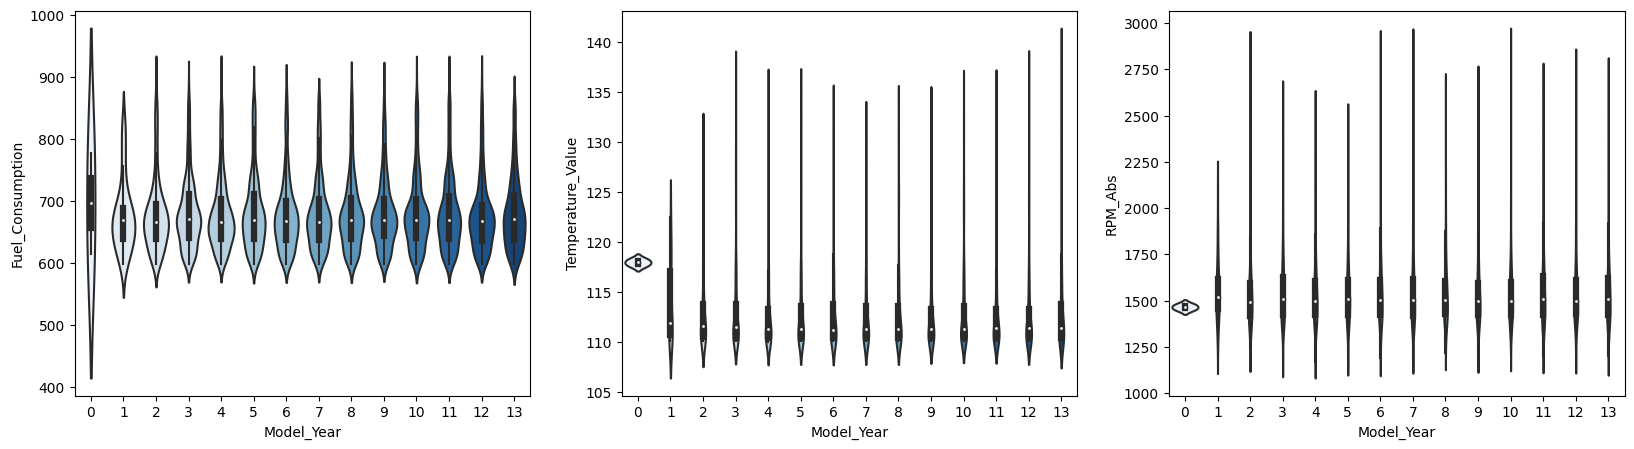

In [ ]:
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(20, 5))
for i in range(len(numerical_columns)):
    sns.violinplot(x="Model_Year", y=numerical_columns[i], data=df, palette="Blues", ax=axs[i])
plt.show()


As the model number increases, the fuel consumption tends to increase. This is likely due to the increased number of specifications for larger model numbers.
<br><br>
As the model year decreases, there are also fewer cars with higher RPM magnitude values. This is likely because of the technological advances in car engineering over the years that made it possible to achieve higher RPMs than before.
<br><br>

In [73]:
pd.crosstab(df["Model_Year"], df["Failure_Type"])

Failure_Type,0,A,B,C,D,E
Model_Year,,,,,,
0,0,1,0,0,1,0
1,29,6,0,0,6,2
2,231,36,5,7,24,7
3,774,47,12,24,38,21
4,763,23,17,31,22,19
5,838,16,21,29,15,25
6,752,19,15,31,23,23
7,850,20,16,32,21,32
8,766,13,18,33,11,23


In [74]:
pd.crosstab(df["Model_Year"], df["Failure_Type"], normalize="index")

Failure_Type,0,A,B,C,D,E
Model_Year,,,,,,
0,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000
1,0.674419,0.139535,0.000000,0.000000,0.139535,0.046512
2,0.745161,0.116129,0.016129,0.022581,0.077419,0.022581
3,0.844978,0.051310,0.013100,0.026201,0.041485,0.022926
4,0.872000,0.026286,0.019429,0.035429,0.025143,0.021714
5,0.887712,0.016949,0.022246,0.030720,0.015890,0.026483
6,0.871379,0.022016,0.017381,0.035921,0.026651,0.026651
7,0.875386,0.020597,0.016478,0.032956,0.021627,0.032956
8,0.886574,0.015046,0.020833,0.038194,0.012731,0.026620


The number of failures seem to have increased over the years, but this could be due to underreporting and fewer cars being produced back then.